In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# Коэффициенты Стьюдента
student = {
    2: 12.7062047364,
    3: 4.30265272991,
    4: 3.18244630528,
    5: 2.7764451052,
    6: 2.57058183661,
    7: 2.44691184879,
    8: 2.36462425101,
    9: 2.30600413503,
    10: 2.26215716274,
    11: 2.22813885196,
    12: 2.20098516008,
    13: 2.17881282966,
    14: 2.16036865646,
    15: 2.14478668792,
    16: 2.13144954556,
    17: 2.11990529922,
    18: 2.10981557783,
    19: 2.10092204024,
    20: 2.09302405441,
}

In [2]:
## Вводные данные ##

fullname = 'времени 20 колебаний (опыт № 1)'
name = 't' # Измеряемая величина
unit = 'с' # Единица измерения
delta_x_pribor = 0.0005 # Погрешность прибора

# Измерения
x_i = np.array([22.180, 22.178, 22.181 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений времени 20 колебаний (опыт № 1)

## 1. Отображаем исходные значения

$t_i$ = [22.18  22.178 22.181] $с$

N = 3

Порядок округления $t_i$ = $10^{-3}$

## 2. Расcчитываем среднее

$t_{ср} = \frac{\sum { t_i  }}{N} = 22.17967 с$

## 3. Расcчитываем отклонение от среднего

$\Delta t_i = t_i - t_{ср} =$ [ 0.00033 -0.00167  0.00133] $с$

$\sum \Delta t_i = -0.0 с$

## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы

$(\Delta t_i)^2$ = [1.0890e-07 2.7889e-06 1.7689e-06] $с^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N - 1}  } $ = 0.00153 $с$

$3S_i$ = 0.00458 $с$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N(N - 1)}  } $ = 0.00088 $с$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 4.30265272991

$\Delta t_{сл}$ = $ t_{N, p} S $ =0.00379 $с$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$t = t_{окр}$ = 22.18 $с$

## 8. Рассчитываем ошибку округления

$\Delta t_{окр}$ = $ t_{ср} - t_{окр} $ = -0.00033 $с$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta t$ = $ \sqrt { (\Delta t_{сл})^2 + (\Delta t_{окр})^2 + (\Delta t_{пр})^2 }$ =$\sqrt { 0.00379^2 + -0.00033^2 + 0.0005^2} $=0.0038 $с$

## 10. Результат прямых измерений $t$

$t = (22.18 \pm 0.0038) с$

In [3]:
## Вводные данные ##

fullname = 'времени 20 колебаний (опыт № 2)'
name = 't' # Измеряемая величина
unit = 'с' # Единица измерения
delta_x_pribor = 0.0005 # Погрешность прибора

# Измерения
x_i = np.array([23.929, 23.931, 23.929 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений времени 20 колебаний (опыт № 2)

## 1. Отображаем исходные значения

$t_i$ = [23.929 23.931 23.929] $с$

N = 3

Порядок округления $t_i$ = $10^{-3}$

## 2. Расcчитываем среднее

$t_{ср} = \frac{\sum { t_i  }}{N} = 23.92967 с$

## 3. Расcчитываем отклонение от среднего

$\Delta t_i = t_i - t_{ср} =$ [-0.00067  0.00133 -0.00067] $с$

$\sum \Delta t_i = -0.0 с$

## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы

$(\Delta t_i)^2$ = [4.4890e-07 1.7689e-06 4.4890e-07] $с^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N - 1}  } $ = 0.00115 $с$

$3S_i$ = 0.00346 $с$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N(N - 1)}  } $ = 0.00067 $с$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 4.30265272991

$\Delta t_{сл}$ = $ t_{N, p} S $ =0.00288 $с$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$t = t_{окр}$ = 23.93 $с$

## 8. Рассчитываем ошибку округления

$\Delta t_{окр}$ = $ t_{ср} - t_{окр} $ = -0.00033 $с$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta t$ = $ \sqrt { (\Delta t_{сл})^2 + (\Delta t_{окр})^2 + (\Delta t_{пр})^2 }$ =$\sqrt { 0.00288^2 + -0.00033^2 + 0.0005^2} $=0.0029 $с$

## 10. Результат прямых измерений $t$

$t = (23.93 \pm 0.0029) с$

In [4]:
## Вводные данные ##

fullname = 'времени 20 колебаний (опыт № 3)'
name = 't' # Измеряемая величина
unit = 'с' # Единица измерения
delta_x_pribor = 0.0005 # Погрешность прибора

# Измерения
x_i = np.array([25.550, 25.549, 25.548 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений времени 20 колебаний (опыт № 3)

## 1. Отображаем исходные значения

$t_i$ = [25.55  25.549 25.548] $с$

N = 3

Порядок округления $t_i$ = $10^{-3}$

## 2. Расcчитываем среднее

$t_{ср} = \frac{\sum { t_i  }}{N} = 25.549 с$

## 3. Расcчитываем отклонение от среднего

$\Delta t_i = t_i - t_{ср} =$ [ 0.001  0.    -0.001] $с$

$\sum \Delta t_i = 0.0 с$

## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы

$(\Delta t_i)^2$ = [1.e-06 0.e+00 1.e-06] $с^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N - 1}  } $ = 0.001 $с$

$3S_i$ = 0.003 $с$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N(N - 1)}  } $ = 0.00058 $с$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 4.30265272991

$\Delta t_{сл}$ = $ t_{N, p} S $ =0.0025 $с$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$t = t_{окр}$ = 25.55 $с$

## 8. Рассчитываем ошибку округления

$\Delta t_{окр}$ = $ t_{ср} - t_{окр} $ = -0.001 $с$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta t$ = $ \sqrt { (\Delta t_{сл})^2 + (\Delta t_{окр})^2 + (\Delta t_{пр})^2 }$ =$\sqrt { 0.0025^2 + -0.001^2 + 0.0005^2} $=0.0027 $с$

## 10. Результат прямых измерений $t$

$t = (25.55 \pm 0.0027) с$

In [5]:
## Вводные данные ##

fullname = 'времени 20 колебаний (опыт № 4)'
name = 't' # Измеряемая величина
unit = 'с' # Единица измерения
delta_x_pribor = 0.0005 # Погрешность прибора

# Измерения
x_i = np.array([27.066, 27.066, 27.065 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений времени 20 колебаний (опыт № 4)

## 1. Отображаем исходные значения

$t_i$ = [27.066 27.066 27.065] $с$

N = 3

Порядок округления $t_i$ = $10^{-3}$

## 2. Расcчитываем среднее

$t_{ср} = \frac{\sum { t_i  }}{N} = 27.06567 с$

## 3. Расcчитываем отклонение от среднего

$\Delta t_i = t_i - t_{ср} =$ [ 0.00033  0.00033 -0.00067] $с$

$\sum \Delta t_i = -0.0 с$

## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы

$(\Delta t_i)^2$ = [1.089e-07 1.089e-07 4.489e-07] $с^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N - 1}  } $ = 0.00058 $с$

$3S_i$ = 0.00173 $с$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N(N - 1)}  } $ = 0.00033 $с$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 4.30265272991

$\Delta t_{сл}$ = $ t_{N, p} S $ =0.00142 $с$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$t = t_{окр}$ = 27.07 $с$

## 8. Рассчитываем ошибку округления

$\Delta t_{окр}$ = $ t_{ср} - t_{окр} $ = -0.00433 $с$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta t$ = $ \sqrt { (\Delta t_{сл})^2 + (\Delta t_{окр})^2 + (\Delta t_{пр})^2 }$ =$\sqrt { 0.00142^2 + -0.00433^2 + 0.0005^2} $=0.0046 $с$

## 10. Результат прямых измерений $t$

$t = (27.07 \pm 0.0046) с$

In [6]:
## Вводные данные ##

fullname = 'времени 20 колебаний (опыт № 5)'
name = 't' # Измеряемая величина
unit = 'с' # Единица измерения
delta_x_pribor = 0.0005 # Погрешность прибора

# Измерения
x_i = np.array([28.506, 28.510, 28.508, 28.510 ])


## Расчёты. Не трогаем. ##
display(Markdown(rf'# Обработка прямых измерений {fullname}'))

# Отображаем исходные значения
display(Markdown(rf'## 1. Отображаем исходные значения'))
display(Markdown(rf'${name}_i$ = {x_i} ${unit}$'))

# Фиксируем количество измерений
N = x_i.shape[0]
display(Markdown(rf'N = {N}'))

# Выясняем знак округления
x_round = 0
for x in x_i:
    x_i_round = len(str(x).split('.')[1])
    if x_i_round > x_round:
        x_round = x_i_round
display(Markdown(rf'Порядок округления ${name}_i$ = $10^{{{-x_round}}}$'))

# Расcчитываем среднее
display(Markdown(rf'## 2. Расcчитываем среднее'))
display(Markdown(rf''))
x_mean = round(x_i.mean(), x_round + 2)
display(Markdown(rf'${name}_{{ср}} = \frac{{\sum {{ {name}_i  }}}}{{N}} = {x_mean} {unit}$'))

# Расcчитываем отклонение от среднего
display(Markdown(rf'## 3. Расcчитываем отклонение от среднего'))
delta_x_i = x_i - x_mean
display(Markdown(rf'$\Delta {name}_i = {name}_i - {name}_{{ср}} =$ {delta_x_i} ${unit}$'))
display(Markdown(rf'$\sum \Delta {name}_i = {round(delta_x_i.sum(), x_round + 1)} {unit}$'))

# Расcчитываем квадрат отклонения для каждого измерения
display(Markdown(rf'## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы'))
delta_x_i_2 = delta_x_i ** 2
display(Markdown(rf'$(\Delta {name}_i)^2$ = {delta_x_i_2} ${unit}^2$'))

S_i = round((delta_x_i_2.sum()/(N - 1))**0.5, x_round + 2)
display(Markdown(rf'$S_i$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N - 1}}  }} $ = {S_i} ${unit}$'))

x3_s_i = round((delta_x_i_2.sum()/(N - 1))**0.5 * 3, x_round + 2)
display(Markdown(rf'$3S_i$ = {x3_s_i} ${unit}$'))

# Проверяем наличие выбросов
count = 0
for n in range(N):
    if delta_x_i[n] > x3_s_i:
        display(Markdown(rf'Выброс: {x_i[n]}. Необходимо исключить значение.'))
        count += 1
if count == 0:
    display(Markdown(rf'Выбросов нет.'))

# Расcчитываем среднеквадратичное отклонение для всей серии измерений
display(Markdown(rf'## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений'))
S = round((delta_x_i_2.sum()/((N - 1)*N))**0.5, x_round + 2)
display(Markdown(rf'$S$ = $ \sqrt {{ \frac{{\sum {{ (\Delta {name}_i)^2 }}}}{{ N(N - 1)}}  }} $ = {S} ${unit}$'))

# Расcчитываем случайную ошибку измерений
display(Markdown(rf'## 6. Расcчитываем случайную ошибку измерений'))
display(Markdown(rf'$t_{{N, p}}$ = {student[N]}'))

delta_x_random = round(S * student[N], x_round + 2)
display(Markdown(rf'$\Delta {name}_{{сл}}$ = $ t_{{N, p}} S $ ={delta_x_random} ${unit}$'))

# Округляем
display(Markdown(rf'## 7. Округляем'))
new_round = None
for e in range((x_round + 1) * -1, 9, 1):
    if 10 ** e >= delta_x_random:
        new_round = -e
        break
display(Markdown(rf'Новый порядок округления = $10^{{{-new_round}}}$'))
x = x + 0,5 * 10*(-new_round) if x < 0 else x - 0,5 * 10*(-new_round)
x = round(x_mean, new_round)
display(Markdown(rf'${name} = {name}_{{окр}}$ = {x} ${unit}$'))

# Рассчитываем ошибку округления
display(Markdown(rf'## 8. Рассчитываем ошибку округления'))
delta_x_round = round(x_mean - x, x_round + 2)
display(Markdown(rf'$\Delta {name}_{{окр}}$ = $ {name}_{{ср}} - {name}_{{окр}} $ = {delta_x_round} ${unit}$'))

# Расчитываем итоговую погрешность прямых измерений
display(Markdown(rf'## 9. Расчитываем итоговую погрешность прямых измерений'))
delta_x = round((delta_x_random**2 + delta_x_pribor**2 + delta_x_round**2)**0.5, x_round+1)
display(Markdown(rf'$\Delta {name}$ = $ \sqrt {{ (\Delta {name}_{{сл}})^2 + '\
                 rf'(\Delta {name}_{{окр}})^2 + (\Delta {name}_{{пр}})^2 }}$ ='\
                 rf'$\sqrt {{ {delta_x_random}^2 + {delta_x_round}^2 + {delta_x_pribor}^2}} $='
                 rf'{delta_x} ${unit}$'))

# Результат
display(Markdown(rf'## 10. Результат прямых измерений ${name}$'))
display(Markdown(rf'${name} = ({x} \pm {delta_x}) {unit}$'))

# Обработка прямых измерений времени 20 колебаний (опыт № 5)

## 1. Отображаем исходные значения

$t_i$ = [28.506 28.51  28.508 28.51 ] $с$

N = 4

Порядок округления $t_i$ = $10^{-3}$

## 2. Расcчитываем среднее

$t_{ср} = \frac{\sum { t_i  }}{N} = 28.5085 с$

## 3. Расcчитываем отклонение от среднего

$\Delta t_i = t_i - t_{ср} =$ [-0.0025  0.0015 -0.0005  0.0015] $с$

$\sum \Delta t_i = -0.0 с$

## 4. Расcчитываем квадрат отклонения для каждого измерения и проверяем на выбросы

$(\Delta t_i)^2$ = [6.25e-06 2.25e-06 2.50e-07 2.25e-06] $с^2$

$S_i$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N - 1}  } $ = 0.00191 $с$

$3S_i$ = 0.00574 $с$

Выбросов нет.

## 5. Расcчитываем среднеквадратичное отклонение для всей серии измерений

$S$ = $ \sqrt { \frac{\sum { (\Delta t_i)^2 }}{ N(N - 1)}  } $ = 0.00096 $с$

## 6. Расcчитываем случайную ошибку измерений

$t_{N, p}$ = 3.18244630528

$\Delta t_{сл}$ = $ t_{N, p} S $ =0.00306 $с$

## 7. Округляем

Новый порядок округления = $10^{-2}$

$t = t_{окр}$ = 28.51 $с$

## 8. Рассчитываем ошибку округления

$\Delta t_{окр}$ = $ t_{ср} - t_{окр} $ = -0.0015 $с$

## 9. Расчитываем итоговую погрешность прямых измерений

$\Delta t$ = $ \sqrt { (\Delta t_{сл})^2 + (\Delta t_{окр})^2 + (\Delta t_{пр})^2 }$ =$\sqrt { 0.00306^2 + -0.0015^2 + 0.0005^2} $=0.0034 $с$

## 10. Результат прямых измерений $t$

$t = (28.51 \pm 0.0034) с$

In [7]:
t = np.array([22.180, 23.930, 25.550, 27.070, 28.510])
delta_t = np.array([0.004, 0.003, 0.003, 0.005, 0.003])
N = 20

T_exp = t/N
delta_T_exp = delta_t/N
T2_exp = T_exp**2

display(Markdown(rf'T_exp = {T_exp}'))
display(Markdown(rf'delta_T_exp = {delta_T_exp}'))
display(Markdown(rf'T2_exp = {T2_exp}'))

T_exp = [1.109  1.1965 1.2775 1.3535 1.4255]

delta_T_exp = [0.0002  0.00015 0.00015 0.00025 0.00015]

T2_exp = [1.229881   1.43161225 1.63200625 1.83196225 2.03205025]

In [8]:
l = np.array([0.30, 0.35, 0.40, 0.45, 0.50])
g = 9.8135

T_teor = 2*np.pi*(l/g)**0.5
T2_teor = T_teor**2

display(Markdown(rf'T_teor = {T_teor}'))
display(Markdown(rf'T2_teor = {T2_teor}'))

T_teor = [1.09857202 1.1865934  1.2685217  1.34547044 1.41825038]

T2_teor = [1.20686048 1.40800389 1.6091473  1.81029071 2.01143413]

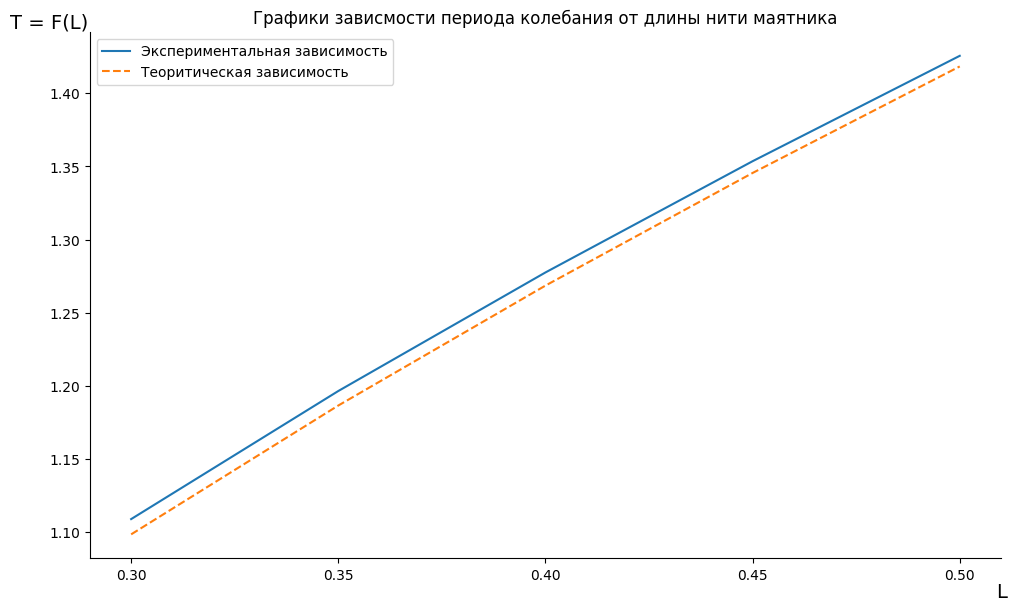

In [9]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
x = l

# Отображаем экспериментальную зависимость
y = T_exp
ax.plot(x, y, label='Экспериментальная зависимость')

# Строим нормальное распределение
y = T_teor
ax.plot(x, y, linestyle='--', label='Теоритическая зависимость')

# Рисуем оси
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('L', size=14, labelpad=0, x=1.)
ax.set_ylabel('T = F(L)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.05, 0.05 
xmin, xmax, ymin, ymax = 0.3, 0.51, 1.1, 1.4 + y_frequency
x_ticks = np.arange(xmin, xmax, x_frequency)
y_ticks = np.arange(ymin, ymax, y_frequency)
ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks[y_ticks**2 > 0.005])


# Выводим оба графика
ax.set_title('Графики зависмости периода колебания от длины нити маятника')
ax.legend()
ax.grid(False)

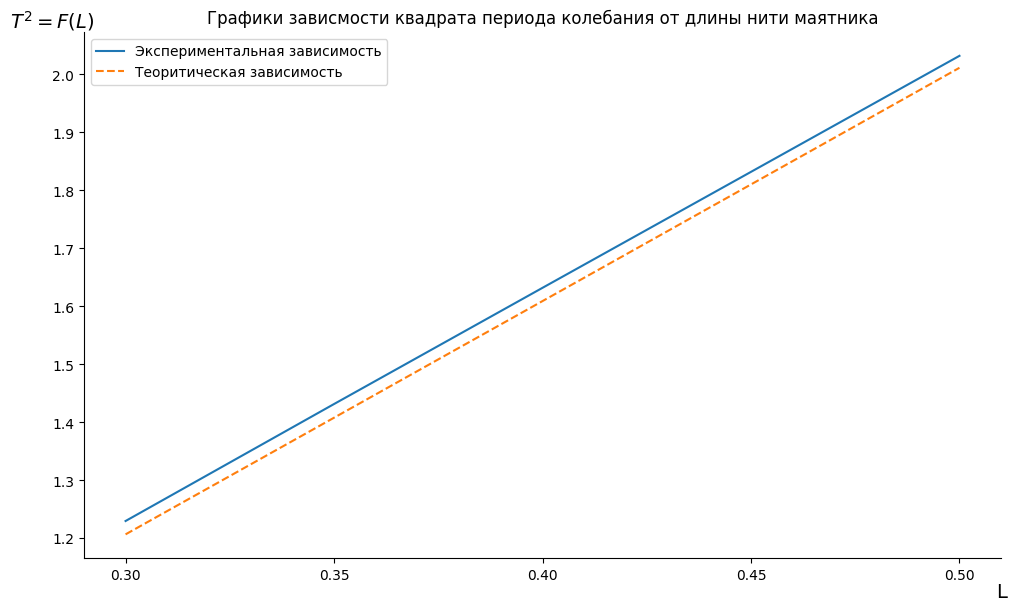

In [10]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
x = l

# Отображаем экспериментальную зависимость
y = T2_exp
ax.plot(x, y, label='Экспериментальная зависимость')

# Строим нормальное распределение
y = T2_teor
ax.plot(x, y, linestyle='--', label='Теоритическая зависимость')

# Рисуем оси
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('L', size=14, labelpad=0, x=1.)
ax.set_ylabel(r'$T^2 = F(L)$', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.05, 0.1 
xmin, xmax, ymin, ymax = 0.3, 0.51, 1.2, 2.0 + y_frequency
x_ticks = np.arange(xmin, xmax, x_frequency)
y_ticks = np.arange(ymin, ymax, y_frequency)
ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks[y_ticks**2 > 0.005])


# Выводим оба графика
ax.set_title('Графики зависмости квадрата периода колебания от длины нити маятника')
ax.legend()
ax.grid(False)

In [11]:
hm = (T_exp - T_teor) / T_teor
print(hm)

[0.00949231 0.00834878 0.00707777 0.00596784 0.00511167]


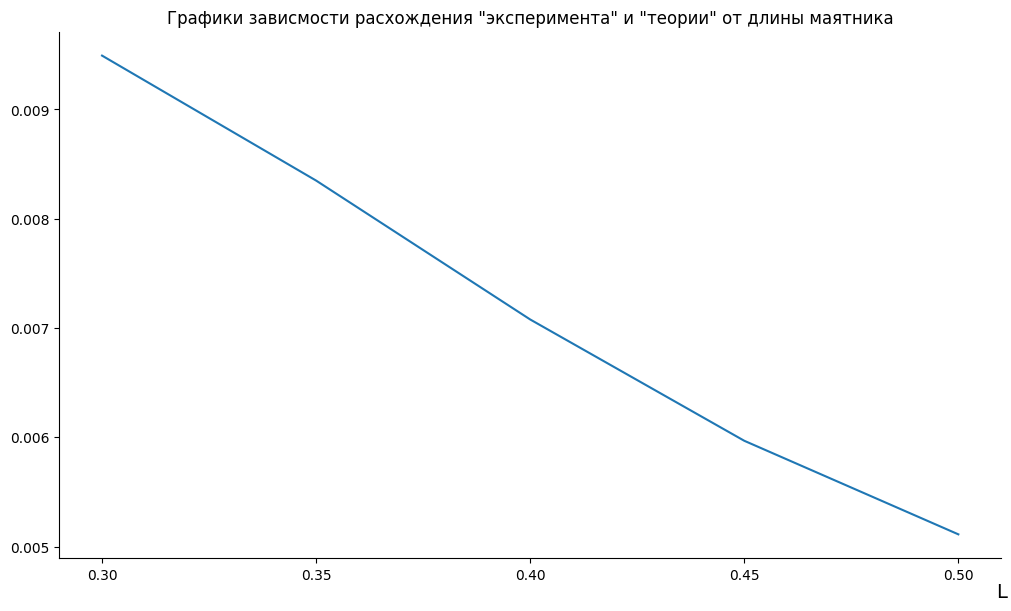

In [12]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
x = l

# Строим нормальное распределение
y = hm
ax.plot(x, y, label='')

# Рисуем оси
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('L', size=14, labelpad=0, x=1.)
ax.set_ylabel('', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.05, 0.01 
xmin, xmax, ymin, ymax = 0.3, 0.51, 0.0, 2.0 + y_frequency
x_ticks = np.arange(xmin, xmax, x_frequency)
# y_ticks = np.arange(ymin, ymax, y_frequency)
ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
# ax.set_yticks(y_ticks[y_ticks**2 > 0.005])


# Выводим оба графика
ax.set_title('Графики зависмости расхождения "эксперимента" и "теории" от длины маятника')
# ax.legend()
ax.grid(False)